<a href="https://colab.research.google.com/github/tsega200/airbnb_classifiers/blob/main/Airbnb_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BLUF**

We conducted the analysis with 2 classifers, logisitic regression and the MLPClassifier. We would recommend logistic regression with Pycaret. But from our interpretation, there is no best classifier.


For M4, we have the Airbnb dataset. This dataset is fairly complex. The notebook was already explored and preprocessed. Missing values, outliers, encodings, skewness, feature importance, and PCA has been checked and done. We used ‘y.mean()’ to check whether our data is balanced or not. Following this, we got a value of 0.2639, which means that the data is fairly unbalanced. We decided  that oversampling is needed. We used SMOTE to oversample. When dealing with imbalanced datasets, where one class has significantly fewer samples than the other(s).
In such cases, the classifier can become biased towards the majority
class and fail to identify the minority class. This is because the model will
prioritize accuracy on the majority class, as it has more samples to train on.
As a result, the minority class may be misclassified or completely ignored. SMOTE is a
technique that addresses this issue by oversampling the minority class. It
creates synthetic data points by interpolating between existing minority class
samples, effectively increasing the number of instances of the minority class.
This helps to balance the class distribution and reduce the risk of the
classifier being biased towards the majority class.
Using SMOTE, we believe that it can improve the performance of  our machine learning models, particularly
those that are sensitive to imbalanced class distribution, such as logistic
regression, which Is one of our classifiers

For classifiers, we chose to do logistic regression first. 
 
Logistic regression is a type of binary classification algorithm used in machine learning. It is used to predict a binary outcome, such as yes or no, true or false.
In logistic regression, the input variables (also known as features) are used to predict the probability of the output variable being 1 or 0. The output of logistic regression is a probability score that falls between 0 and 1. This score can then be thresholded to classify the input into one of the two classes. This type of classifier may not perform well on highly imbalanced datasets such as ours. In such cases, more advanced machine learning algorithms, such as decision trees or neural networks, may be more appropriate.
 
 
Note: in a learning curve, a high training accuracy and low validation accuracy indicate that the model has learned to fit the training data too closely and is not able to generalize well to new, unseen data. To address this issue, you may need to apply regularization techniques.
 

Pycaret's logisitic regression accuracy is 0.736 whereas using scikit learn library was 0.56, indicating that the accuracy is better with Pycaret.  


For logistic regression classifier with sckikit libraries, the learning curve showed that the training accuracy meets the validation accuracy when it reached about 9000 samples. It overfits the training data since the model fits the data very closely.With the MLPClassifier, the learning curve depicted that the training accuracy was higher than the validation accuracy where it overfits on the training data since the model fits the data too closely, and does not generalize to new data. It was overfitted since it captured the random variations in the training data.  Compared to logistic regression, MLPClassifier overfits the model,  but logisitic regression better fits the model. MLP has a better accuracy than logisitic regression, 0.6 versus 0.56 respectively.



#**Business Problem**

Knowing which home listings to recommend to a guest could provide huge business value to Airbnb. Therefore, ​we would like to train a classifier model that can clasify which listings specific user is likely to click on, contact host, and/or book​. The dataset provided here contains a random sample of our 7-day search log from two markets: Rio de Janeiro and Sao Paulo

Every time a user conducts a search they are shown certain number of listings that are available for the searched location, dates and search filters. Given the search results, the user can conduct one or more action on a specific listing: impress (no action), click (which takes user to listing page), contact host (to inquire about listing) and finally book.

![Google's logo](https://hoteltechnologynews.com/wp-content/uploads/2019/08/airbnb-678x381.png)

#**Libraries**

In [ ]:
!pip install -q pycaret autoviz --upgrade psynlig
from pycaret.classification import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
from pycaret.classification import setup
from pycaret.classification import tune_model
from pycaret.classification import setup
from pycaret.classification import compare_models
from pycaret.classification import *


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.601. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine


In [ ]:
# Basic libraries
%matplotlib inline
import pandas as pd
from psynlig import pca_explained_variance_bar
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as ss
import math
from matplotlib.colors import ListedColormap

In [ ]:
# sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, log_loss, balanced_accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

In [ ]:
import sklearn                                          # Sci-Kit Learn library (most important machine learning library in Python) 
from sklearn import datasets                            # Imports some toy daatsets embedded in the sklean library
from sklearn.preprocessing import StandardScaler        # Used to standardize a column of data (i.e., create z scores) 
from sklearn.linear_model import Perceptron             # Implementation of the Perceptron algorithm in sklearn 
from sklearn.metrics import accuracy_score              # Used to compute the accuracy of a machine learning classifier
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
# mblearn library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

#**Data Dictionary**
The file name is `data.csv`

-   Each row in the dataset is one of the listings that is a result of a
    search conducted by a user (identified with `id_search`)

-   Each row has a `label` that tells us what is the ultimate action
    performed on the listing: `impression`, `click`, `host_contact` or `book`.
    Keep in mind that we use the latest action as label. Therefore, if
    label is contact host, it means that before that user also did an
    impression and click. Or if the label is book, the user also did
    impression and click on the listing and may have contacted the host
    (if `ds_contact` is present) or may have just directly booked without
    contacting the host.

-   Listings are uniquely defined using `id_listing` field in the dataset.

-   Searcher (Booker) is uniquely defined using `id_user` field in the
    dataset

## Features 
The features can be categorized into the
following groups:​

-   Query Features: (location, check-in & check-out dates and filters
    such as number of guests, etc​: (they start with `query_*` in the
    dataset). These are features related to user's search query

-   Listing Features:​ (they start with `listing_*` in the dataset)
    These are various attributes of the listings (such as price, review
    count, review rating, location, etc.)

#**Explanation of Features**
Below find a table of original
 features provided to you. It is very useful to read the descriptions
 to understand the meaning behind each features. Reading the
 descriptions will also help you come up with derived features. Note
 that some of the features (such as dates) you can't directly use in
 modeling but you can use them to build very useful derived features.


|  **Feature Name**      |            **Description**|
  |--------------------------------- |---------------------------------------------|
|`id_search`|Unique ID of the search|
|`label`|Listing label (booked, contact host, clicked, impressed)|
|`id_user`|Unique ID of the user|
|`id_listing`|Unique ID of the listing|
|`ts_search`|timestamp of the search|
|`ds_search`|date of the search|
|`ds_book`|date when listing was booked by user|
|`ds_contact`|date when host was contacted|
|`query_market`|market of user search (e.g. Sao Paulo)|
|`query_checkin`|searched checkin date|
|`query_checkout`|searched checkout date|
|`query_num_guests`|searched number of guest (filter)|
|`query_num_children`|searched number of children (filter)|
|`query_num_infants`|searched number of infants (filter)|
|`query_radius`|search query radius (map size)|
|`query_price_max`|maximum price search filter|
|`query_price_min`|minimum price search filter|
|`query_center_lat`|latitude of searched location center|
|`query_center_lng`|longitude of searched location center|
|`listing_is_new`|listing is new (has 0 reviews and bookings)|
|`listing_total_price`|total price of listing for selected dates|
|`listing_instant_bookable`|is listing instant bookable (possible to book without the need to first contact the host)|
|`listing_lat`|listing latitude|
|`listing_lng`|listing longitude|
|`listing_review_rating`|average review rating of listing given by guests (1 to 5)|
|`listing_review_count`|number of guest reviews|
|`listing_property_type`|property type id|
|`listing_room_type`|room type|
|`listing_num_beds`|number of beds|
|`listing_num_bedrooms`|number of bedrooms|
|`listing_num_bathrooms`|number of bathroom|
|`listing_person_capacity`|how many guests listing can host (set by host)|
|`listing_has_pro_pictures`|if listing has pro photos|
|`listing_num_recent_reservations`|number of recent reservation|
|`listing_location_rating`|average location rating (given by guests)|
|`listing_cleanliness_rating`|average cleanliness rating (given by guests)|
|`listing_checkin_rating`|average checkin rating (given by guests)|
|`listing_value_rating`|average value rating (given by guests)|
|`listing_communication_rating`|average communication rating (given by guests)|
|`listing_accuracy_rating`|average accuracy rating (given by guests)|
|`listing_num_books_90day`|number of bookings in last 90 days|
|`listing_occupancy_rate`|listing occupancy rate (what fraction of nights get booked)|
|`listing_monthly_discount`|if listing has monthly discount|
|`listing_weekly_discount`|if listing weekly discount provided by host|
|`listing_cleaning_fee`|cleaning fee|
|`listing_monthly_price_factor`|monthly discount price multiplier|
|`listing_weekly_price_factor`|weekly discount price multiplier|
|`listing_minimum_nights`|minimum nights allowed by host|
|`listing_maximum_nights`|maximum nights allowed by host|

Note: 'label' is converted to binary, with 'click', 'host_contact' and 'book' all coded 1, and 'impress' coded 0.

#**Data**

In [ ]:
# Read
# File: https://drive.google.com/file/d/1q1kXWiIPdAR1XlfNN9738XrOUVeHdIM2/view?usp=share_link
url = 'https://drive.google.com/uc?id=1q1kXWiIPdAR1XlfNN9738XrOUVeHdIM2'

# Read in the dataset
df = pd.read_csv(url)

In [ ]:
df

id_search       label  \
0       1d320d4d-4826-42b6-9ebe-97d8f2adc543  impression   
1       94f40f5e-5d7c-4593-b745-220c8db1070d  impression   
2       e9649afc-d30a-4b77-bb0a-8cfd5c3423ea  impression   
3       75c98fbc-84e9-4dde-b882-87f9985d1942  impression   
4       11886a08-c9da-4b41-98cd-8d4109a35779  impression   
...                                      ...         ...   
177583  c4aa1ca6-b374-4829-9ea8-2b7495f19c49       click   
177584  c1f1a02d-cac1-4d77-b7a2-c387e140aed8  impression   
177585  497ef8f3-e6c3-4a94-b817-3625583c11a0  impression   
177586  497ef8f3-e6c3-4a94-b817-3625583c11a0  impression   
177587  3329163b-42cc-47a1-a8b9-15c49c62f157  impression   

                                 id_user                        id_listing  \
0       e566365a0638690cc6572c40e99729ac  6f6d6ba9c29e63a1fdb85742a598b5b5   
1       e566365a0638690cc6572c40e99729ac  15eaa0a653431dfb2c80e3e031866e49   
2       e566365a0638690cc6572c40e99729ac  69a48538dedb0975b59feaa6ba38567a   
3       e566365a0638690cc6572c40e99729ac  79b9a8296d922ad4ebbd44c511049b90   
4       e566365a0638690cc6572c40e99729ac  cc68e4db29988e237131d93e022d7316   
...                                  ...                               ...   
177583  f99499cdc24746a2085a2868decf23b8  d9c26ad33ab9ba17fc5f408352402826   
177584  f99499cdc24746a2085a2868decf23b8  0e56177c4f6478bb781373842b655975   
177585  f99499cdc24746a2085a2868decf23b8  207da3dad3492e5fc366278a0c489053   
177586  f99499cdc24746a2085a2868decf23b8  297925bb4305c5de1cf665b4c552b596   
177587  f99499cdc24746a2085a2868decf23b8  8d11a128cd11cbe88325f1d469822875   

             ts_search ds_search ds_book ds_contact    query_market  \
0       11/26/18 17:18  11/26/18     NaN        NaN  Rio de Janeiro   
1       11/26/18 17:18  11/26/18     NaN        NaN  Rio de Janeiro   
2       11/26/18 17:19  11/26/18     NaN        NaN  Rio de Janeiro   
3       11/26/18 17:19  11/26/18     NaN        NaN  Rio de Janeiro   
4       11/26/18 17:19  11/26/18     NaN        NaN  Rio de Janeiro   
...                ...       ...     ...        ...             ...   
177583  11/26/18 23:41  11/26/18     NaN        NaN       Sao Paulo   
177584  11/26/18 18:11  11/26/18     NaN        NaN       Sao Paulo   
177585  11/26/18 20:28  11/26/18     NaN        NaN       Sao Paulo   
177586  11/26/18 20:28  11/26/18     NaN        NaN       Sao Paulo   
177587  11/26/18 20:27  11/26/18     NaN        NaN       Sao Paulo   

       query_checkin  ... listing_accuracy_rating  listing_num_books_90day  \
0            4/24/19  ...                4.787234                     14.0   
1            4/24/19  ...                5.000000                      NaN   
2            4/24/19  ...                4.873563                     12.0   
3            4/24/19  ...                4.714286                      5.0   
4            4/24/19  ...                5.000000                      0.0   
...              ...  ...                     ...                      ...   
177583      11/28/18  ...               -1.000000                      NaN   
177584      11/28/18  ...               -1.000000                      0.0   
177585      11/29/18  ...                5.000000                      NaN   
177586      11/29/18  ...                5.000000                      2.0   
177587      11/29/18  ...               -1.000000                      0.0   

        listing_occupancy_rate  listing_monthly_discount  \
0                     0.730061                         1   
1                     0.624278                         0   
2                          NaN                         1   
3                     0.066667                         1   
4                     0.000000                         0   
...                        ...                       ...   
177583                0.000000                         0   
177584                0.000000                         0   
177585                0.888889                 

In [ ]:
df = df.sample(10000)

#**M2: Exploratory Data Analysis**

In [ ]:
# Shape of df
print("Shape", df.shape)

# Check data types
print(df.info())

Shape (10000, 49)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 79207 to 13159
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_search                        10000 non-null  object 
 1   label                            10000 non-null  object 
 2   id_user                          10000 non-null  object 
 3   id_listing                       10000 non-null  object 
 4   ts_search                        10000 non-null  object 
 5   ds_search                        10000 non-null  object 
 6   ds_book                          132 non-null    object 
 7   ds_contact                       294 non-null    object 
 8   query_market                     10000 non-null  object 
 9   query_checkin                    10000 non-null  object 
 10  query_checkout                   10000 non-null  object 
 11  query_num_guests                 10000 non-null  int64  
 

In [ ]:
df.head()

id_search       label  \
79207   00ba2b49-dce0-4aa8-839a-ba20f8b761d1  impression   
171051  4ffd31d2-4d6e-40d9-a062-5cac65607ae2  impression   
103552  a6e3abd8-90fb-4b8d-bde8-277f508df0a6  impression   
108853  6eac1645-df38-4b7c-b572-67cfdb96c87b  impression   
162696  643660b7-7001-4ef4-a25f-4bc1f2873006  impression   

                                 id_user                        id_listing  \
79207   e048fe7fb691ae78a15a0a8e1ade33c5  21feeb76ab30c8d5573cbae053ab98f7   
171051  fcc70ed17acd38ff12c2d971ee4ceba3  6f79e9a69345d772d10ea803cf643fdf   
103552  15fee6c0eca5f89e9821969b5850bb7f  27c98f5b5bc80f72514efe96b5455b51   
108853  6b5e483f531bebcc46f22d3ced73e5c5  1556237e7e464eb5af526c7bfe76b9c0   
162696  f40d58337b2ca7dc63dafb608401c3aa  06719a3b2dc6b1260329d500239e4bf5   

             ts_search ds_search ds_book ds_contact    query_market  \
79207    11/21/18 0:39  11/21/18     NaN        NaN       Sao Paulo   
171051  11/25/18 22:27  11/25/18     NaN        NaN  Rio de Janeiro   
103552   11/20/18 1:16  11/20/18     NaN        NaN       Sao Paulo   
108853  11/21/18 23:17  11/21/18     NaN        NaN  Rio de Janeiro   
162696  11/21/18 17:13  11/21/18     NaN        NaN  Rio de Janeiro   

       query_checkin  ... listing_accuracy_rating  listing_num_books_90day  \
79207         4/4/19  ...                5.000000                      2.0   
171051      12/17/18  ...               -1.000000                      0.0   
103552      11/21/18  ...                4.966667                     40.0   
108853       1/11/19  ...               -1.000000                      0.0   
162696       12/3/18  ...                5.000000                      1.0   

        listing_occupancy_rate  listing_monthly_discount  \
79207                 0.047904                         0   
171051                     NaN                         1   
103552                0.949495                         1   
108853                     NaN                         0   
162696                0.011173                         1   

        listing_weekly_discount  listing_cleaning_fee  \
79207                         0             31.935957   
171051                        1                   NaN   
103552                        1                   NaN   
108853                        0             47.903940   
162696                        0             79.839900   

        listing_monthly_price_factor  listing_weekly_price_factor  \
79207                            1.0                         1.00   
171051                           0.6                         0.90   
103552                          0.51                         0.79   
108853                           NaN                          NaN   
162696                           0.8                          NaN   

        listing_minimum_nights  listing_maximum_nights  
79207                      1.0                  1125.0  
171051                     2.0                  1125.0  
103552                     1.0                     7.0  
108853                     1.0                  1125.0  
162696                     1.0                   500.0  

[5 rows x 49 columns]

In [ ]:
df.columns

Index(['id_search', 'label', 'id_user', 'id_listing', 'ts_search', 'ds_search',
       'ds_book', 'ds_contact', 'query_market', 'query_checkin',
       'query_checkout', 'query_num_guests', 'query_num_children',
       'query_num_infants', 'query_radius', 'query_price_max',
       'query_price_min', 'query_center_lat', 'query_center_lng',
       'listing_is_new', 'listing_total_price', 'listing_instant_bookable',
       'listing_lat', 'listing_lng', 'listing_review_rating',
       'listing_review_count', 'listing_property_type', 'listing_room_type',
       'listing_num_beds', 'listing_num_bedrooms', 'listing_num_bathrooms',
       'listing_person_capacity', 'listing_has_pro_pictures',
       'listing_num_recent_reservations', 'listing_location_rating',
       'listing_cleanliness_rating', 'listing_checkin_rating',
       'listing_value_rating', 'listing_communication_rating',
       'listing_accuracy_rating', 'listing_num_books_90day',
       'listing_occupancy_rate', 'listing_monthly_

In [ ]:
# Drop ID, Customer_ID and SSN columns
df = df.drop(['id_search','ds_book', 'ds_contact', 'id_user', 'id_listing', 'ts_search',	'ds_search','query_checkin','query_checkout'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 79207 to 13159
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   label                            10000 non-null  object 
 1   query_market                     10000 non-null  object 
 2   query_num_guests                 10000 non-null  int64  
 3   query_num_children               10000 non-null  int64  
 4   query_num_infants                10000 non-null  int64  
 5   query_radius                     10000 non-null  float64
 6   query_price_max                  10000 non-null  float64
 7   query_price_min                  10000 non-null  int64  
 8   query_center_lat                 10000 non-null  float64
 9   query_center_lng                 10000 non-null  float64
 10  listing_is_new                   10000 non-null  int64  
 11  listing_total_price              9490 non-null   float64
 12  listing_instan

In [ ]:
# Feature Types
categorical_features = ['query_market','listing_instant_bookable', 'listing_room_type','listing_is_new','listing_has_pro_pictures', 'listing_property_type','listing_monthly_price_factor']
quant_features = list(set(df.columns) - set(categorical_features)-set(['label']))
target = ['label']


In [ ]:
# get unique values of the target ('label')
for feature in ['label']:
  unique_values = df[feature].unique()
  print(feature,unique_values)

label ['impression' 'click' 'host_contact' 'book']


In [ ]:
# count NaNs
df.isna().sum()

label                                 0
query_market                          0
query_num_guests                      0
query_num_children                    0
query_num_infants                     0
query_radius                          0
query_price_max                       0
query_price_min                       0
query_center_lat                      0
query_center_lng                      0
listing_is_new                        0
listing_total_price                 510
listing_instant_bookable              0
listing_lat                           0
listing_lng                           0
listing_review_rating              1224
listing_review_count               1004
listing_property_type               499
listing_room_type                     0
listing_num_beds                    500
listing_num_bedrooms                524
listing_num_bathrooms               496
listing_person_capacity               0
listing_has_pro_pictures            527
listing_num_recent_reservations       0


In [ ]:
# Identify duplicates (dups)
df.duplicated().sum()

5

In [ ]:
# summary
df.describe().T

count          mean           std  \
query_num_guests                 10000.0 -8.947600e+00  1.069166e+02   
query_num_children               10000.0  1.317000e-01  4.892638e-01   
query_num_infants                10000.0  2.240000e-02  1.571646e-01   
query_radius                     10000.0  1.430316e+01  5.094175e+01   
query_price_max                  10000.0  1.294704e+07  1.169916e+08   
query_price_min                  10000.0  4.807800e+00  3.521417e+01   
query_center_lat                 10000.0 -2.310980e+01  4.229780e-01   
query_center_lng                 10000.0 -4.407165e+01  1.532073e+00   
listing_is_new                   10000.0  1.922000e-01  3.940491e-01   
listing_total_price               9490.0  7.122496e+02  1.730427e+03   
listing_lat                      10000.0 -2.311237e+01  4.750731e-01   
listing_lng                      10000.0 -4.408353e+01  1.555263e+00   
listing_review_rating             8776.0  3.408140e+00  2.161229e+00   
listing_review_count              8996.0  2.294075e+01  3.873520e+01   
listing_property_type             9501.0  8.817914e+00  1.608711e+01   
listing_num_beds                  9500.0  2.771579e+00  2.734301e+00   
listing_num_bedrooms              9476.0  1.499789e+00  1.116582e+00   
listing_person_capacity          10000.0  4.360700e+00  2.739151e+00   
listing_num_recent_reservations  10000.0  1.100000e-03  3.314966e-02   
listing_location_rating          10000.0  3.293508e+00  2.595149e+00   
listing_cleanliness_rating       10000.0  3.196293e+00  2.547864e+00   
listing_checkin_rating           10000.0  3.318832e+00  2.610967e+00   
listing_value_rating             10000.0  3.171720e+00  2.530058e+00   
listing_communication_rating     10000.0  3.313470e+00  2.606603e+00   
listing_accuracy_rating          10000.0  3.271937e+00  2.585065e+00   
listing_num_books_90day           8604.0  5.491864e+00  7.387471e+00   
listing_occupancy_rate            9393.0  2.946258e-01  3.107269e-01   
listing_monthly_discount         10000.0  5.855000e-01  4.926601e-01   
listing_weekly_discount          10000.0  5.727000e-01  4.947112e-01   
listing_cleaning_fee              7485.0  3.419512e+01  2.773358e+01   
listing_weekly_price_factor       7531.0  9.177490e-01  7.451515e-02   
listing_minimum_nights            9987.0  2.336137e+00  3.258485e+00   
listing_maximum_nights            9987.0  2.009540e+05  1.415062e+07   

                                         min         25%          50%  \
query_num_guests                -1000.000000    1.000000     2.000000   
query_num_children                  0.000000    0.000000     0.000000   
query_num_infants                   0.000000    0.000000     0.000000   
query_radius                        0.021910    0.860848     1.935958   
query_price_max                    -1.000000   -1.000000    -1.000000   
query_price_min                    -1.000000   -1.000000    -1.000000   
query_center_lat                  -31.850000  -23.470000   -22.980000   
query_center_lng                  -52.220000  -46.187500   -43.200000   
listing_is_new                      0.000000    0.000000     0.000000   
listing_total_price                 7.731437  138.451870   306.523220   
listing_lat                       -34.950000  -23.202500   -22.980000   
listing_lng                       -58.420000  -45.685000   -43.200000   
listing_review_rating               0.000000    0.000000     4.714286   
listing_review_count                0.000000    0.000000     6.000000   
listing_property_type               1.000000    1.000000     1.000000   
listing_num_beds                    0.000000    1.000000     2.000000   
listing_num_bedrooms                0.000000    1.000000     1.000000   
listing_person_capacity             1.000000    2.000000     4.000000   
listing_num_recent_reservations     0.000000    0.000000     0.000000   
listing_location_rating            -1.000000   -1.000000     4.864407   
listing_cleanliness_rating         -1.000000   -1.000

In [ ]:
df.nunique()

label                                 4
query_market                          2
query_num_guests                     17
query_num_children                    6
query_num_infants                     3
query_radius                       5136
query_price_max                     402
query_price_min                     164
query_center_lat                    153
query_center_lng                    230
listing_is_new                        2
listing_total_price                5844
listing_instant_bookable              2
listing_lat                         169
listing_lng                         261
listing_review_rating               936
listing_review_count                212
listing_property_type                34
listing_room_type                     3
listing_num_beds                     28
listing_num_bedrooms                 12
listing_num_bathrooms                37
listing_person_capacity              16
listing_has_pro_pictures              2
listing_num_recent_reservations       2


In [ ]:
# Skewness
df[quant_features].skew()

listing_num_books_90day             2.096109
listing_lng                        -0.669544
query_price_max                     8.926409
listing_person_capacity             1.919884
listing_occupancy_rate              0.597829
listing_monthly_discount           -0.347165
listing_review_rating              -0.913181
listing_weekly_discount            -0.293968
query_num_guests                   -9.160497
listing_checkin_rating             -1.037172
query_num_children                  4.330608
listing_cleanliness_rating         -1.005186
query_num_infants                   7.505719
query_price_min                    12.563883
listing_num_beds                    6.238606
query_center_lng                   -0.755958
listing_cleaning_fee                5.615250
listing_num_bathrooms               3.861147
listing_communication_rating       -1.036973
listing_value_rating               -1.015830
listing_num_recent_reservations    30.105878
listing_location_rating            -1.035575
listing_nu

In [ ]:
# create an AutoViz class
AV = AutoViz_Class()

In [ ]:
# # create charts
%matplotlib inline
# dftc = AV.AutoViz(filename='', sep ='' , depVar = 'label', dfte = df, header = 0,
# verbose = 1, lowess = False, chart_format ='png', max_rows_analyzed = 2000, max_cols_analyzed = 30)

# **M3: Preprocessing**

##*Missing Values*

In [ ]:
# Missing Values
for feature in quant_features:
  df[feature].fillna(0, inplace=True)   # Replace NaNs in selected columns with zeroes
df['listing_num_bathrooms'].fillna('0', inplace=True)   # Replace NaNs in selected columns with zeroes
df['listing_has_pro_pictures'].fillna('0', inplace=True)   # Replace NaNs in selected columns with zeroes
df['listing_monthly_price_factor'].fillna('0', inplace=True)   # Replace NaNs in selected columns with zeroes
most_common_val = df['listing_property_type'].value_counts().idxmax()
df['listing_property_type'].fillna(most_common_val, inplace=True)   # Replace NaNs in selected columns with zeroes


In [ ]:
# Mitigate negative values
df['query_center_lat']=df['query_center_lat'] + 90
df['query_center_lng']=df['query_center_lng'] + 180
df['listing_lat']=df['listing_lat'] + 90
df['listing_lng']=df['listing_lng'] + 180
df['listing_location_rating']=df['listing_location_rating'] + 1
df['query_num_guests']=df['query_num_guests'] + 1000
for feature in ['listing_accuracy_rating','query_price_min','query_price_max','listing_communication_rating','listing_value_rating','listing_checkin_rating','listing_cleanliness_rating']:
  df[feature]=df[feature] + 1


In [ ]:
df.describe()

query_num_guests  query_num_children  query_num_infants  query_radius  \
count      10000.000000        10000.000000       10000.000000  10000.000000   
mean         991.052400            0.131700           0.022400     14.303156   
std          106.916561            0.489264           0.157165     50.941745   
min            0.000000            0.000000           0.000000      0.021910   
25%         1001.000000            0.000000           0.000000      0.860848   
50%         1002.000000            0.000000           0.000000      1.935958   
75%         1003.000000            0.000000           0.000000     13.276996   
max         1016.000000            5.000000           2.000000   2100.341000   

       query_price_max  query_price_min  query_center_lat  query_center_lng  \
count     1.000000e+04     10000.000000      10000.000000      10000.000000   
mean      1.294704e+07         5.807800         66.890198        135.928345   
std       1.169916e+08        35.214166          0.422978          1.532073   
min       0.000000e+00         0.000000         58.150000        127.780000   
25%       0.000000e+00         0.000000         66.530000        133.812500   
50%       0.000000e+00         0.000000         67.020000        136.800000   
75%       5.200000e+01         1.000000         67.050000        136.820000   
max       1.070000e+09      1042.000000         87.740000        158.400000   

       listing_is_new  listing_total_price  ...  listing_communication_rating  \
count    10000.000000         10000.000000  ...                  10000.000000   
mean         0.192200           675.924882  ...                      4.313470   
std          0.394049          1692.987225  ...                      2.606603   
min          0.000000             0.000000  ...                      0.000000   
25%          0.000000           118.127967  ...                      0.000000   
50%          0.000000           279.869020  ...                      5.902439   
75%          0.000000           659.999325  ...                      6.000000   
max          1.000000         55255.960000  ...                      6.000000   

       listing_accuracy_rating  listing_num_books_90day  \
count             10000.000000             10000.000000   
mean                  4.271937                 4.725200   
std                   2.585065                 7.111845   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   5.826087                 1.000000   
75%                   6.000000                 7.000000   
max                   6.000000                59.000000   

       listing_occupancy_rate  listing_monthly_discount  \
count            10000.000000               10000.00000   
mean                 0.276742                   0.58550   
std                  0.309257                   0.49266   
min                  0.000000                   0.00000   
25%                  0.000000                   0.00000   
50%                  0.132597                   1.00000   
75%                  0.545455                   1.00000   
max                  1.000000                   1.00000   

       listing_weekly_discount  listing_cleaning_fee  \
count             10000.000000          10000.000000   
mean                  0.572700             25.595048   
std                   0.494711             28.210490   
min                   0.000000              0.000000   
25%                   0.000000              0.000000   
50%                   1.000000             26.119686   
75%                   1.000000             39.734783   
max                   1.000000            653.075740   

       listing_weekly_price_factor  listing_minimum_nights  \
count                 10000.000000            10000.000000   
mean                      0.691157                2.333100   
std                       0.401009                3.257454   
min                       0

In [ ]:
# count NaNs
df.isna().sum()

label                              0
query_market                       0
query_num_guests                   0
query_num_children                 0
query_num_infants                  0
query_radius                       0
query_price_max                    0
query_price_min                    0
query_center_lat                   0
query_center_lng                   0
listing_is_new                     0
listing_total_price                0
listing_instant_bookable           0
listing_lat                        0
listing_lng                        0
listing_review_rating              0
listing_review_count               0
listing_property_type              0
listing_room_type                  0
listing_num_beds                   0
listing_num_bedrooms               0
listing_num_bathrooms              0
listing_person_capacity            0
listing_has_pro_pictures           0
listing_num_recent_reservations    0
listing_location_rating            0
listing_cleanliness_rating         0
l

##*Encodings*

In [ ]:
# Encode categorical target variable 
# we want 2 target values instead of 3

df['label'] = df['label'].replace({'book': 1,'host_contact': 1,'impression': 0,'click': 1})

In [ ]:
df

label    query_market  query_num_guests  query_num_children  \
79207       0       Sao Paulo              1004                   0   
171051      0  Rio de Janeiro              1004                   2   
103552      0       Sao Paulo              1001                   0   
108853      0  Rio de Janeiro              1004                   1   
162696      0  Rio de Janeiro              1002                   0   
...       ...             ...               ...                 ...   
30460       0       Sao Paulo              1005                   0   
129578      0       Sao Paulo              1001                   0   
61697       0       Sao Paulo              1002                   0   
145519      0  Rio de Janeiro              1002                   0   
13159       0  Rio de Janeiro              1001                   0   

        query_num_infants  query_radius  query_price_max  query_price_min  \
79207                   0      1.235286              0.0                0   
171051                  0    455.342130              0.0                0   
103552                  0     24.999628              0.0                0   
108853                  0      0.587986            113.0                1   
162696                  0     24.999628              0.0                0   
...                   ...           ...              ...              ...   
30460                   0     23.668920            483.0                1   
129578                  0      0.411044              0.0                0   
61697                   0      1.696995             75.0                1   
145519                  0     18.622690             29.0                1   
13159                   0     24.999628              0.0                0   

        query_center_lat  query_center_lng  ...  listing_accuracy_rating  \
79207              66.39            133.32  ...                 6.000000   
171051             60.92            158.40  ...                 0.000000   
103552             66.45            133.37  ...                 5.966667   
108853             67.04            136.83  ...                 0.000000   
162696             67.09            136.83  ...                 6.000000   
...                  ...               ...  ...                      ...   
30460              66.23            133.57  ...                 0.000000   
129578             66.43            133.31  ...                 0.000000   
61697              66.44            133.34  ...                 5.762886   
145519             67.09            136.69  ...                 6.000000   
13159              67.09            136.83  ...                 0.000000   

        listing_num_books_90day  listing_occupancy_rate  \
79207                       2.0                0.047904   
171051                      0.0                0.000000   
103552                     40.0                0.949495   
108853                      0.0                0.000000   
162696                      1.0                0.011173   
...                         ...                     ...   
30460                       0.0                0.000000   
129578                      0.0                0.000000   
61697                       0.0                0.919540   
145519                      2.0                0.067416   
13159                       8.0                0.000000   

        listing_monthly_discount  listing_weekly_discount  \
79207                          0                        0   
171051                         1                        1   
103552                         1                        1   
108853                         0                        0   
162696                         1                        0   
...                          ...                      ...   
30460                          0                        0   
129578                         1                        1   
61697                          0                        0  

In [ ]:
# Encode the categoricals
df = pd.get_dummies(data=df, columns=['query_market', 'listing_room_type','listing_instant_bookable','listing_has_pro_pictures'], drop_first=True)

In [ ]:
# Label encoding
from sklearn import preprocessing
le = LabelEncoder()
lb = preprocessing.LabelBinarizer()
''
# apply label encoding to each column
# for col in ['query_market', 'listing_room_type']:
#     if df[col].dtype == 'object':
#         df[col] = le.fit_transform(df[col])

for col in ['listing_num_bathrooms','listing_monthly_price_factor']:
    if df[col].dtype == 'str':
        df[col] = le.fit_transform(df[col])

df['listing_monthly_price_factor']=pd.to_numeric(df['listing_monthly_price_factor'], errors='coerce')

In [ ]:
# pick numerical variables and set them as X
for feature in quant_features:
  df[feature]=pd.to_numeric(df[feature], errors='coerce')
X = df[quant_features]

In [ ]:
# quant_features1=['query_center_lat',
#  'listing_lng',
#  'listing_total_price',
#  'listing_checkin_rating',
#  'listing_monthly_discount',
#  'listing_num_beds',
#  'listing_weekly_price_factor',
#  'query_center_lng',
#  'listing_value_rating',
#  'listing_cleanliness_rating',
#  'listing_num_bedrooms',
#  'listing_review_rating']
# quant_features2=['query_price_min',
#  'query_num_children',
#  'query_num_infants',
#  'listing_cleaning_fee',
#  'listing_review_count',
#  'listing_lat',
#  'listing_weekly_discount',
#  'listing_num_bathrooms',
#  'query_radius',
#  'listing_num_recent_reservations',
#  'listing_location_rating',
#  'listing_num_books_90day']
# quant_features3=['query_num_guests',
#  'listing_occupancy_rate',
#  'listing_person_capacity',
# 'listing_communication_rating',
#  'listing_accuracy_rating']

##*Skewness*

In [ ]:
from scipy.special import boxcox1p
# Apply the Box-Cox transformation to each feature
for feature in quant_features:
    # Add a small constant to avoid negative values
    df[feature] = boxcox1p(df[feature] + 1, 0)

##*Outliers**

In [ ]:
# Tukey Rule outliers
# As an alternative, you could use z-scores greater than 3 or less than -3.

#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in quant_features:
  outliers_Tukey = tukey_rule(X,i)
  
# Winsorize X and check the results
X_winsorized = X.copy(deep=True)
for i in quant_features:
  X_winsorized[i] = winsorize(X[i], limits=(0.05, 0.05))

In [ ]:
# Update result df with winzorized quant features

def winzorized(self):
  for ls in self:
    df[ls]=X_winsorized[ls]

winzorized(quant_features)

In [ ]:
# Resolve large and smal values
df.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
# Check df again
df

label  query_num_guests  query_num_children  query_num_infants  \
79207       0              1004                   0                  0   
171051      0              1004                   1                  0   
103552      0              1001                   0                  0   
108853      0              1004                   1                  0   
162696      0              1002                   0                  0   
...       ...               ...                 ...                ...   
30460       0              1005                   0                  0   
129578      0              1001                   0                  0   
61697       0              1002                   0                  0   
145519      0              1002                   0                  0   
13159       0              1001                   0                  0   

        query_radius  query_price_max  query_price_min  query_center_lat  \
79207       1.235286              0.0                0             66.41   
171051     25.457027              0.0                0             66.41   
103552     24.999628              0.0                0             66.45   
108853      0.587986            113.0                1             67.04   
162696     24.999628              0.0                0             67.09   
...              ...              ...              ...               ...   
30460      23.668920            226.0                1             66.41   
129578      0.411044              0.0                0             66.43   
61697       1.696995             75.0                1             66.44   
145519     18.622690             29.0                1             67.09   
13159      24.999628              0.0                0             67.09   

        query_center_lng  listing_is_new  ...  listing_monthly_price_factor  \
79207             133.32               0  ...                          1.00   
171051            136.83               1  ...                          0.60   
103552            133.37               0  ...                          0.51   
108853            136.83               0  ...                          0.00   
162696            136.83               0  ...                          0.80   
...                  ...             ...  ...                           ...   
30460             133.57               1  ...                          0.00   
129578            133.32               1  ...                          0.60   
61697             133.34               0  ...                          1.00   
145519            136.69               0  ...                          0.80   
13159             136.83               0  ...                          0.80   

        listing_weekly_price_factor  listing_minimum_nights  \
79207                          1.00                     1.0   
171051                         0.90                     2.0   
103552                         0.79                     1.0   
108853                         0.00                     1.0   
162696                         0.00                     1.0   
...                             ...                     ...   
30460                          0.00                     3.0   
129578                         0.79                     2.0   
61697                          1.00                     1.0   
145519                         0.88                     2.0   
13159                          0.90                     1.0   

        listing_maximum_nights  query_market_Sao Paulo  \
79207                   1125.0                       1   
171051                  1125.0                       0   
103552                    14.0                       1   
108853                  1125.0                       0   
162696                   500.0                       0   
...                        ...                     ...   
30460                   1125.0                       1   
129578                    30.0      

##*Feature Importance*

In [ ]:
# Feature Importance
# Load your dataset and split into features (X) and target (y)
X = df.drop(['label'],axis=1)               # Here we drop the target from the results dataframe. axis = 1 refers to the "feature axis". X is a dataframe containing the predictors
y = df['label']

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier()

# Train the model on your dataset
rfc.fit(X, y)

# Extract feature importances from the model
importances = rfc.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

Text(0.5, 1.0, 'Feature importance for classification dataset')

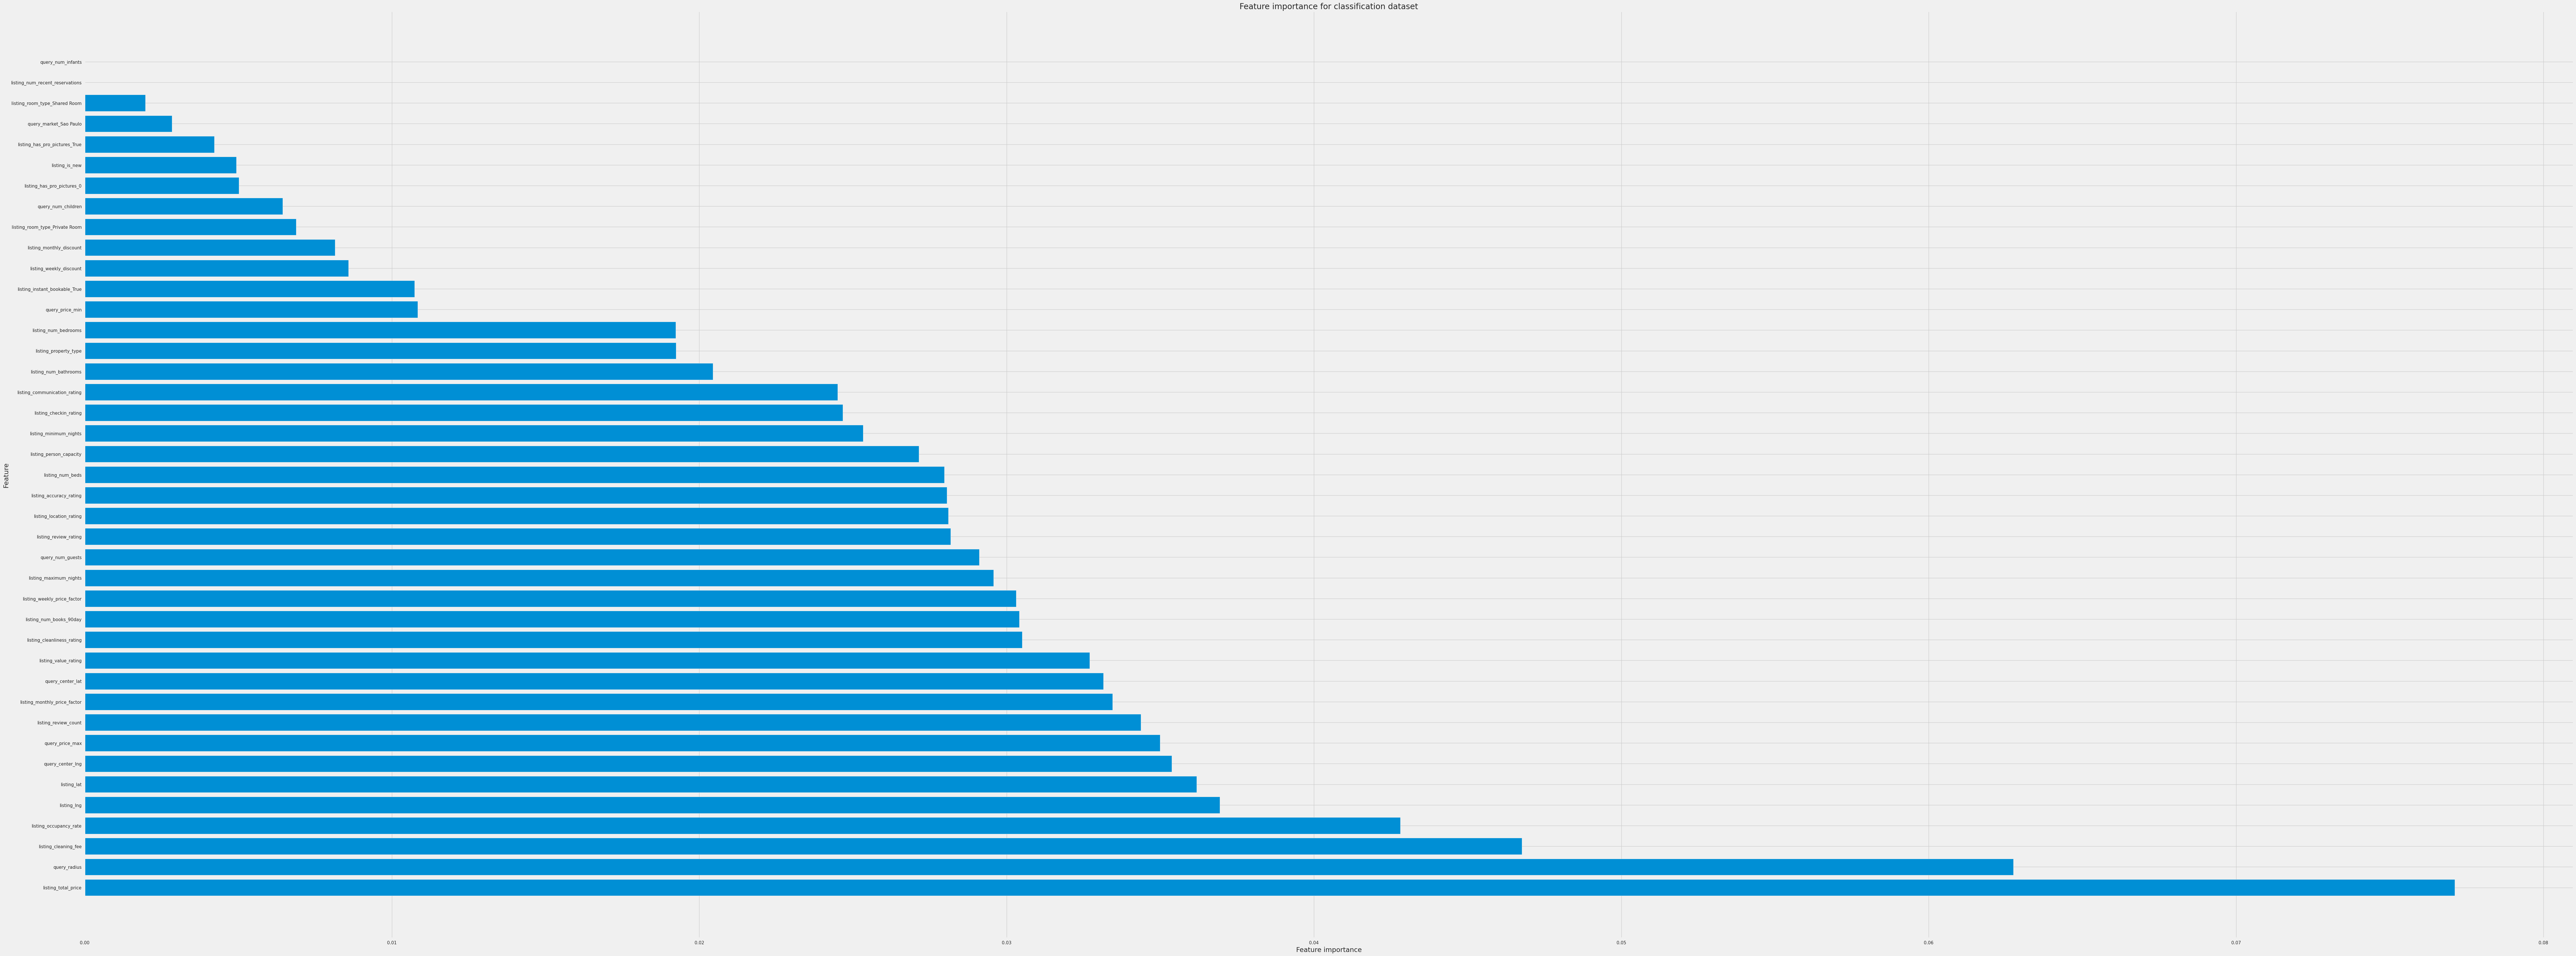

In [ ]:
# Create a bar chart of feature importances
plt.figure(figsize=(100, 40))
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature importance for classification dataset")

In [ ]:
X=X[['listing_total_price','query_radius', 'query_price_max', 'listing_cleaning_fee', 'query_num_guests', 'query_center_lng', 'listing_occupancy_rate','listing_lng',
       'listing_num_books_90day', 'listing_review_count']]

##*Balance*

In [ ]:
# Balance of the dataset
y.mean()

0.2639

##*Principal Components Analysis (PCA)*

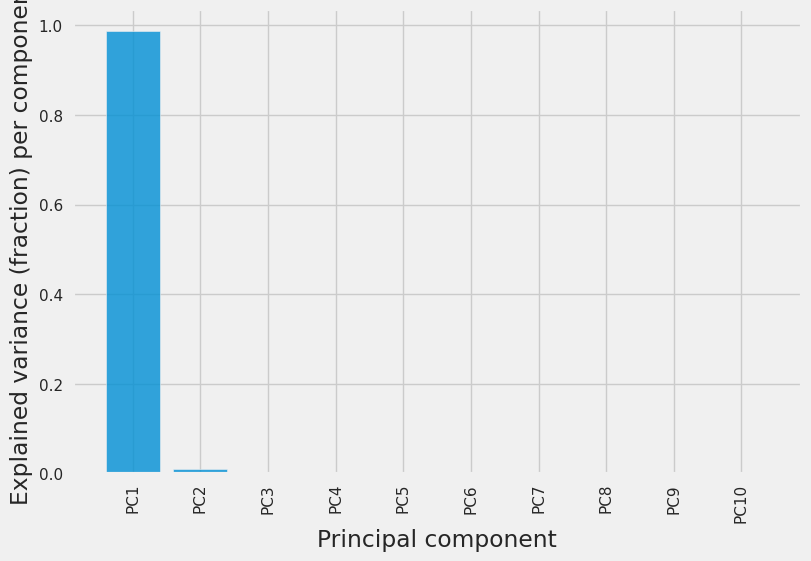

In [ ]:
# Principal Components Analysis
# Examine the explained variance ratio in order for each components
pca = PCA()
X_winsorized_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

pca_explained_variance_bar(pca, alpha=0.8)
plt.show()

# This suggests that we may be able to use two or three (and certainly no more than 6 pricipal components) to build models

In [ ]:
# Pairplot the principal component data
import plotly.express as px
components = pca.fit_transform(X)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["label"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

##*Training & Test Datasets*

In [ ]:
# Split data into training and test data
x1_train, x1_test,y1_train,y1_test = train_test_split(X,y, test_size=0.2, random_state=0) 

In [ ]:
# Shape of x1_train
x1_train.shape

(8000, 10)

##*SMOTE*

In [ ]:
# SMOTE (Synthetic Minority Class Oversampling) of training data
smote = SMOTE(random_state=42)
x1_train, y1_train = smote.fit_resample(x1_train, y1_train)

In [ ]:
# Shape of x1_train
x1_train.shape

(11778, 10)

##*Recursive Feature Importance (RFE)*

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
_ = rfe.fit(X,y)
print('Important Features\n',X.columns[rfe.support_])
rf = RandomForestClassifier()
_ = rf.fit(rfe.transform(X), y)
print("\n Accuracy: ",rf.score(rfe.transform(X), y))

Important Features
 Index(['listing_total_price', 'query_radius', 'listing_cleaning_fee',
       'listing_occupancy_rate', 'listing_review_count'],
      dtype='object')

 Accuracy:  0.9986


##*Low-Code PyCaret Classification*

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],    
                                ['pca', PCA(n_components = 5)],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000)]])

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)
    
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',    
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(x1_train, np.ravel(y1_train))
test_score = grid_search.score(x1_test, y1_test)

print(f'Test set ROC score: {test_score}')
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(confusion_matrix(y1_test,y_pred,labels=[0,1]))

Test set ROC score: 0.5417297122035573
{'classifier__C': 10}
Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=11,
                       sampling_strategy='auto')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     n_oversamples=10, power_iteration_normalizer='auto',
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ['classifier',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=11,
            

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

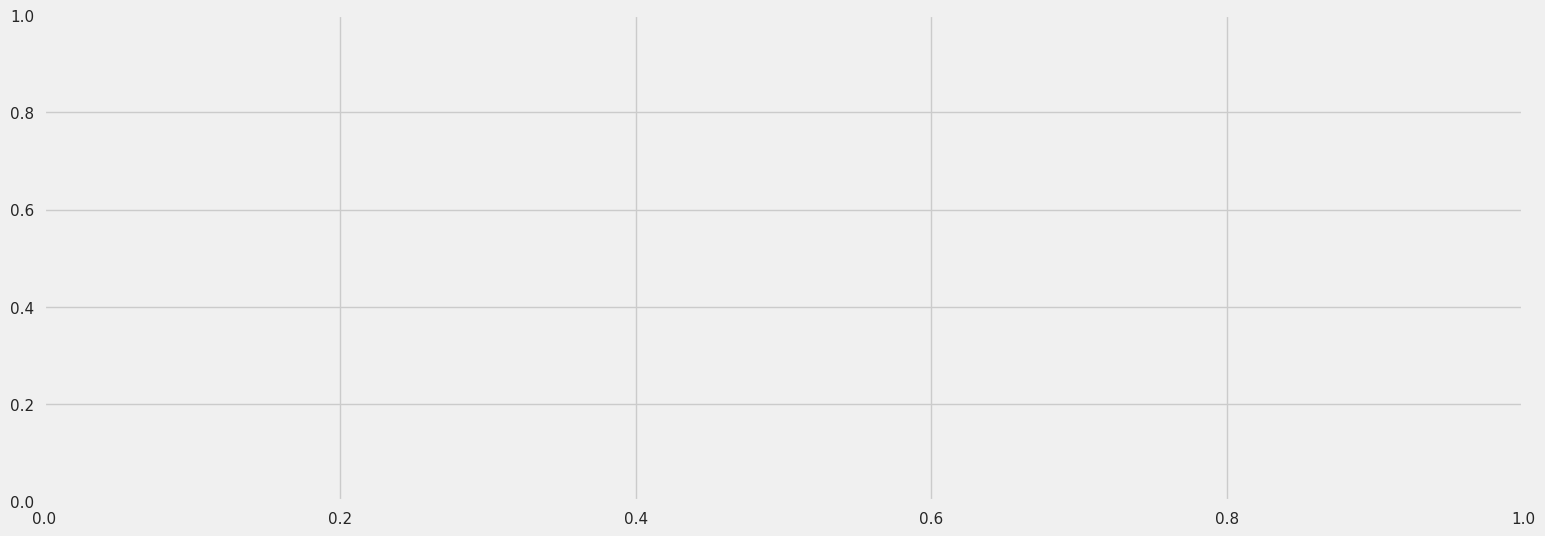

In [ ]:
#Low-Code PyCaret code
# Combine the predictor dataframe x1_train and target dataframe y1_train to get df1
df1 = pd.concat([x1_train,y1_train],axis=1)
# Initialize PyCaret
clf = setup(data=df, target='label')

# Compare multiple models and select the best one
best_model = compare_models(sort='AUC')

# Tune the model using a grid search
tuned_model = tune_model(best_model)

# Evaluate the performance of the tuned model
evaluate_model(tuned_model)

# Train the best model on the entire dataset
final_model = finalize_model(tuned_model)

# # Interpret final_model and plot the AUC curve
# plot_model(final_model, plot='auc')

In [ ]:
# Fit PyCaret classifier on training data
pycaret_clf = tuned_model.fit(x1_train, y1_train)

# Predict target values for test data
y1_hat = pycaret_clf.predict(x1_test)
y1_hat=pd.DataFrame(y1_hat)
cm = confusion_matrix(y1_test, y1_hat)
accuracy =  (cm[0,0] + cm[1,1])/( cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]) 
print("Confusion matrix\n",cm, "\n\nAccuracy = ",accuracy) 

Confusion matrix
 [[1459    0]
 [ 541    0]] 

Accuracy =  0.7295


In [ ]:
# Show tuned_model
tuned_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1e-07, loss='log_loss', max_depth=1,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.4, min_samples_leaf=1,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=190, n_iter_no_change=None,
                           random_state=1974, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

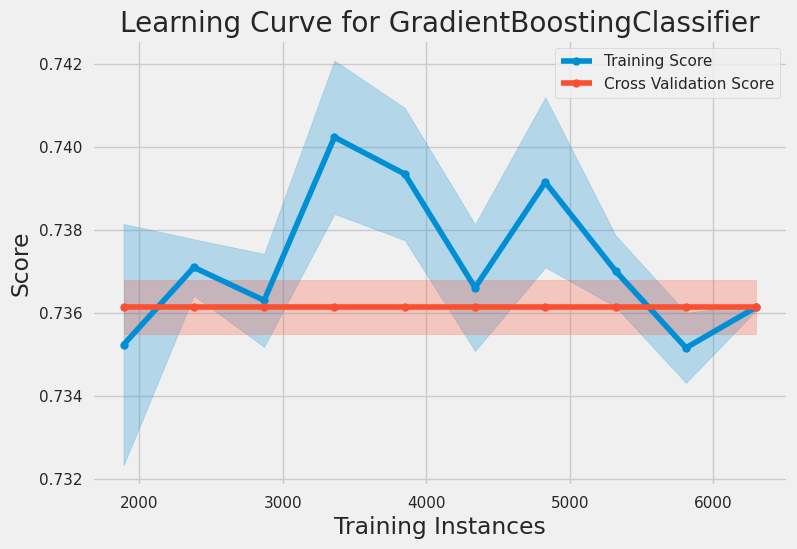

In [ ]:
plot_model(tuned_model, plot = 'learning', use_train_data = True)


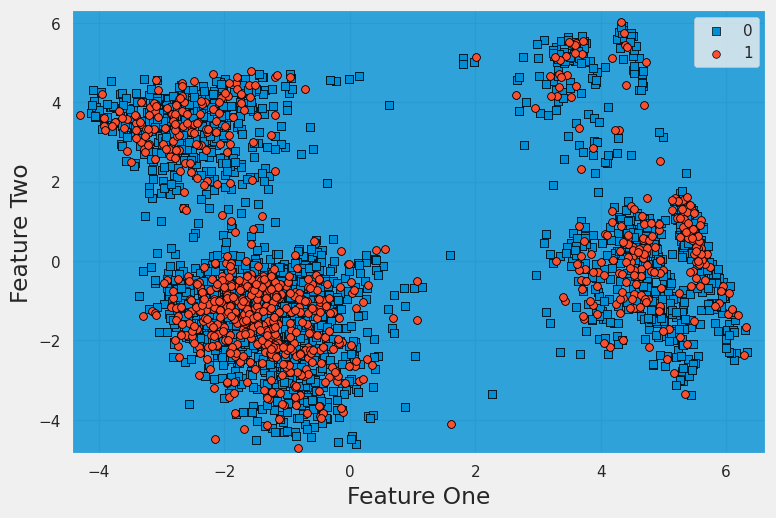

In [ ]:
# Decision boundary using low-code
plot_model(tuned_model, plot = 'boundary', use_train_data = True)


In [ ]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test =\
    train_test_split(X, y, 
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0, 
                     stratify=y)
print('Shape of X and y',X.shape, y.shape, '\nShape of training set X and y',x1_train.shape, y1_train.shape, '\nShape of test set X and y',x1_test.shape, y1_test.shape) 


Shape of X and y (10000, 10) (10000,) 
Shape of training set X and y (8000, 10) (8000,) 
Shape of test set X and y (2000, 10) (2000,)


In [ ]:
# Create a SMOTE object
#smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
#x1_train_res, y1_train_res = smote.fit_resample(x1_train, y1_train)

# Print the shape of the original and resampled training sets
#print('Shape of original X and y:', x1_train.shape, y1_train.shape)
#print('Shape of resampled X and y:', x1_train_res.shape, y1_train_res.shape)

Shape of original X and y: (11778, 10) (11778,)
Shape of resampled X and y: (11778, 10) (11778,)


In [ ]:
smote = SMOTE(random_state=42)
x1_train, y1_train = smote.fit_resample(x1_train, y1_train)

In [ ]:
stdsc = StandardScaler()  #we fit the StandardScaler class only once—on the training data—and use those parameters to transform the test dataset or any new data point.
X_train_std = pd.DataFrame(stdsc.fit_transform(x1_train))
X_test_std = pd.DataFrame(stdsc.transform(x1_test))

In [ ]:
# Get started with logistic regression (logit) classifier
clm = LogisticRegression(random_state=1, solver='sag',max_iter=1000,class_weight='balanced')     # Create logit model specifying random number seed to get repeatable results, use sag solver as lbfgs does not converge
                                                                 # The following guidance about solvers is taken from the sklearn documentation:
                                                                 # For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
                                                                 # For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
                                                                 # ‘liblinear’ is limited to one-versus-rest schemes.

clm.fit(X_train_std, np.ravel(y1_train))            # Fit model using training data. Ravel converts a column vector into the required 1D array format.
y_pred = clm.predict(X_test_std)                                 # Apply model to test data
print('Logit: AUC = ', roc_auc_score(y1_test,y_pred), ' recall =', recall_score(y1_test, y_pred),' accuracy = ', accuracy_score(y1_test, y_pred))    # Test set accuracy
print(confusion_matrix(y_true=y1_test,y_pred=y_pred))                           # Confusion matrix
print("Logit Model Coefficients",list(clm.coef_))                # Logistic coefficients (can be used to assess which variables have the largest effect size in the model)


Logit: AUC =  0.5122385540184453  recall = 0.5265151515151515  accuracy =  0.5055
[[733 739]
 [250 278]]
Logit Model Coefficients [array([-0.21083934,  0.07710235,  0.18643577,  0.04536801, -0.07134687,
        0.05655458,  0.16500866,  0.02884015, -0.07777091, -0.08164651])]


In [ ]:
# Examine propensities of logit model
logit_propensities = pd.DataFrame(clm.predict_proba(X_test_std)) 

# Create a dataframe showing actuals, predicted, and propensities 
y_pred = pd.DataFrame(y_pred)
y_pred.reset_index(drop = True , inplace = True)
y1_test.reset_index(drop = True , inplace = True)
results = pd.concat([y1_test, y_pred, logit_propensities[1]], axis=1)
results.columns= ['Actual','Predicted','Propensity']

#Compute percentage of instances with propensities in [lower_limit,upper_limit]
upper_limit = 0.7
lower_limit = 0.3
count = 0
for i in range(0,len(logit_propensities[1])):
  if((logit_propensities.loc[i,1] >= lower_limit) & (logit_propensities.loc[i,1] <= upper_limit)):
    count = count + 1
print('Percentage of test instances with propensity in [%1.2f, %1.2f]: %3.2f' % (lower_limit,upper_limit,100 * count/len(logit_propensities[1])))

# Show instances where predicted and actual differ
print('Instances for which actual and predicted differ:')
discrepancies = results.loc[results['Actual'] != results['Predicted']]
discrepancies


Percentage of test instances with propensity in [0.30, 0.70]: 96.80
Instances for which actual and predicted differ:


Actual  Predicted  Propensity
1          1          0    0.461583
3          0          1    0.518030
6          0          1    0.506168
7          0          1    0.554549
8          0          1    0.551806
...      ...        ...         ...
1988       0          1    0.511220
1990       0          1    0.641438
1991       0          1    0.515264
1998       1          0    0.376915
1999       0          1    0.518489

[989 rows x 3 columns]

Test Accuracy: 0.505
[[733 739]
 [250 278]]


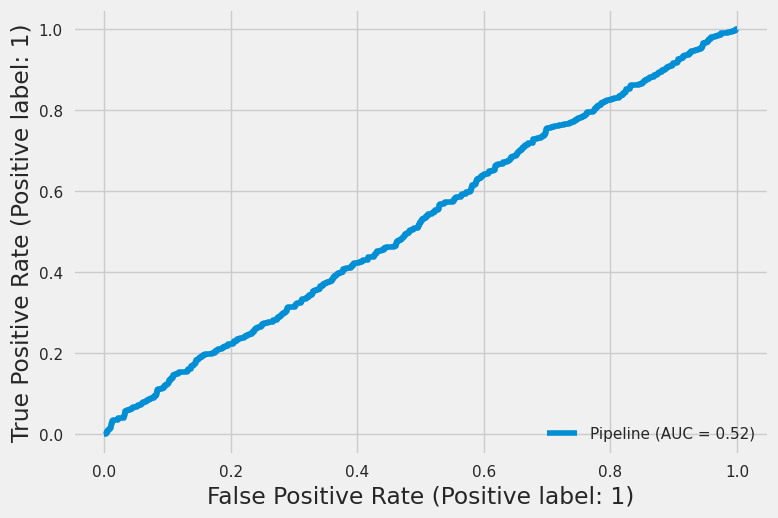

In [ ]:
# In pursuit of a competitive model with a much smaller number of predictors, create a pipeline that scales, performs PCA, and fits and scores a logit model
# Use weights to a) offset the effect of the imbalance in the target column (212 M out of 569 total), and b) emphasize that a false negative may be much worse than a false positive

weights = {0:0.8, 1:0.2} # The weights are supposed to penalize errors in the classes. So, if we think false positives are 4 times "worse" than false negatives
                         # we should set the weights to be {0:0.2, 1:0.8}. But the implementation in sklearn appears to be backwards, so experiment with this  
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression())

pipe_lr.fit(X_train_std, np.ravel(y1_train))
y_pred = pipe_lr.predict(X_test_std)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test_std, y1_test))
print(confusion_matrix(y1_test,y_pred,labels=[0,1]))                           # Confusion matrix
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(
        pipe_lr, X_test_std, y1_test,
    )

Test Mean:  [0.5657167  0.56733141 0.57123684 0.57140568 0.57463271]


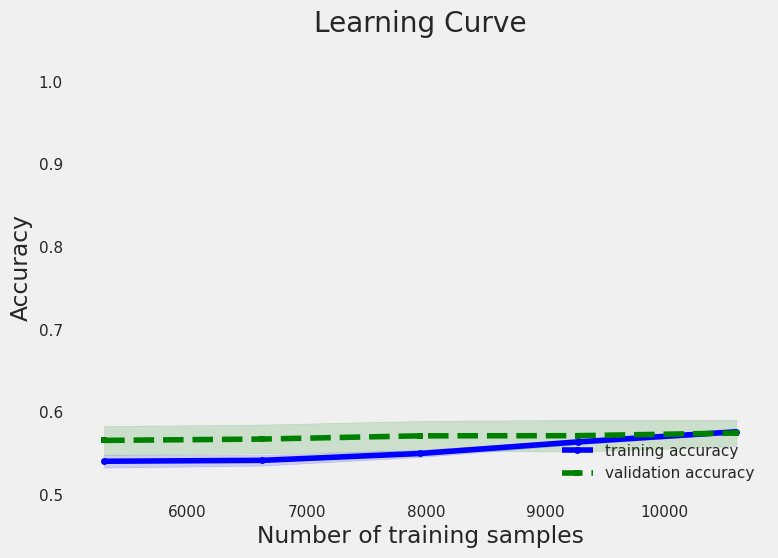

In [ ]:
from sklearn.model_selection import learning_curve
model = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', LogisticRegression())])

train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                               X=x1_train,
                               y=y1_train,
                               train_sizes=np.linspace(0.5, 1.0, 5),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


print('Test Mean: ',test_mean)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.title('Learning Curve')
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()

Test Mean:  [0.589125 0.5935   0.60775  0.590875 0.6     ]


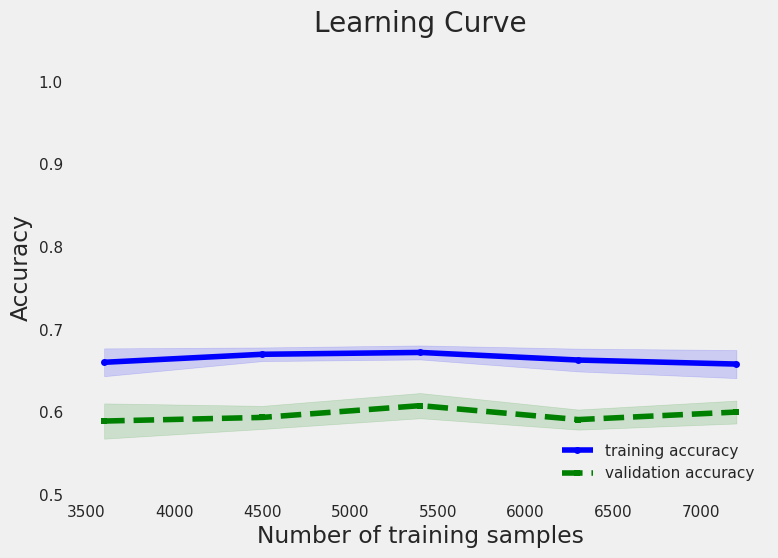

In [ ]:
from sklearn.model_selection import learning_curve
model = imbpipeline([
        ('sample', SMOTE()),
        ('std', StandardScaler()),
        ('clf', MLPClassifier())])

train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                               X=x1_train,
                               y=y1_train,
                               train_sizes=np.linspace(0.5, 1.0, 5),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


print('Test Mean: ',test_mean)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.05])
plt.tight_layout()
plt.title('Learning Curve')
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()